In [29]:
# let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [30]:
#Import data in pandas data frame
df = pd.read_csv(r'G:\Portfolio Project\Correlation in python\movies.csv')
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [31]:
# Let's see if there have any missing  data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())

    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [32]:
# See exact missing data 
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [33]:
#Filling the missing values 
df.fillna(df.mean(), inplace=True)
df.fillna(df.mode(), inplace=True)

C:\Users\tareq\AppData\Local\Temp\ipykernel_8944\1502440435.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [34]:
df.isnull().sum()

name         0
rating      77
genre        0
year         0
released     2
score        0
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      0
dtype: int64

In [35]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [36]:
#Change the data type of column

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [37]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [38]:
# Order our Data a little bit to see

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [39]:
# Delete duplicate data
df.drop_duplicates()
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


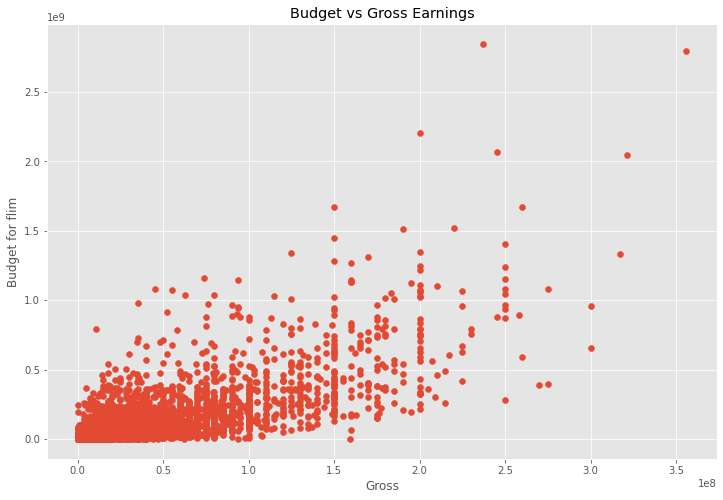

In [40]:
# make scatterplot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross')
plt.ylabel('Budget for flim')

plt.show()

In [41]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


<AxesSubplot:xlabel='gross', ylabel='budget'>

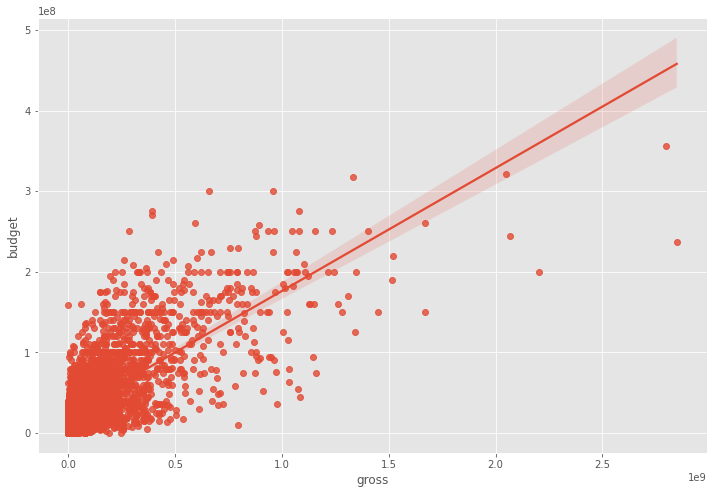

In [42]:
#gross vs budget regression plot using seaborn

sns.regplot(x="gross", y="budget", data=df)

<AxesSubplot:xlabel='score', ylabel='gross'>

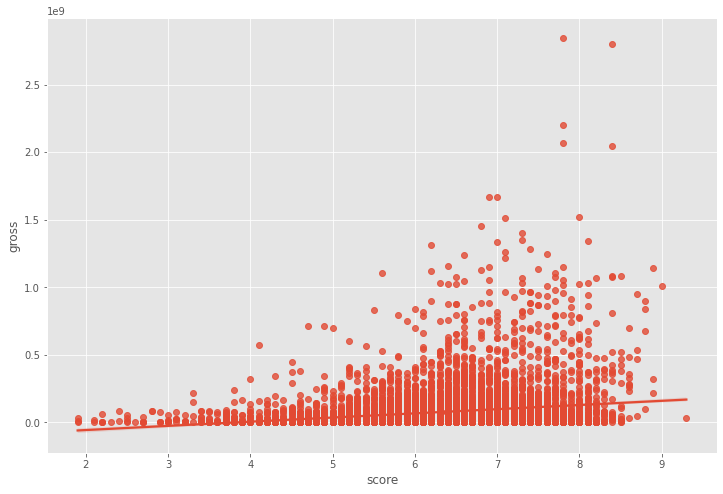

In [43]:
#score vs gross regression plot using seaborn

sns.regplot(x="score", y="gross", data=df)

In [44]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson') #pearson, Kendall, spearman 

,year,score,votes,budget,gross,runtime
year,1.000000,0.097936,0.222810,0.265578,0.252042,0.120766
score,0.097936,1.000000,0.409182,0.064541,0.182868,0.399329
votes,0.222810,0.409182,1.000000,0.421007,0.628713,0.309166
budget,0.265578,0.064541,0.421007,1.000000,0.711270,0.265287
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241335
runtime,0.120766,0.399329,0.309166,0.265287,0.241335,1.000000


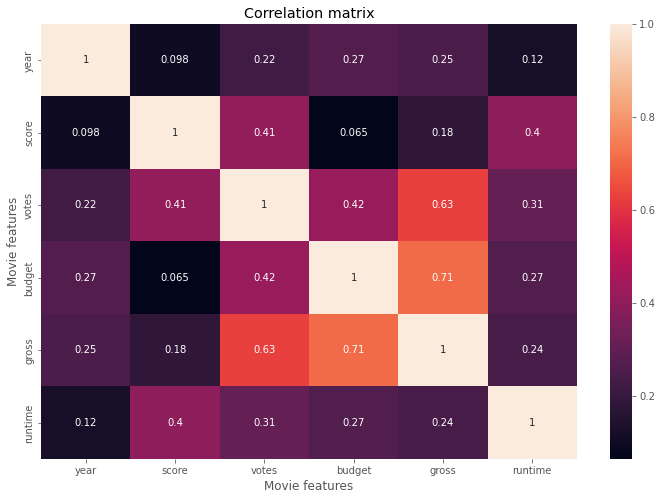

In [45]:
#visualize correlation matrix 

correlation_matirx = df.corr()
sns.heatmap(correlation_matirx, annot = True)

plt.title("Correlation matrix")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

In [46]:
#unstack correlation pair

correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

corr_pairs



name     name        1.000000
         rating      0.301835
         genre       0.135425
         year        0.202910
         released    0.635129
                       ...   
runtime  country     0.017032
         budget      0.054216
         gross       0.059057
         company     0.050219
         runtime     1.000000
Length: 225, dtype: float64

In [47]:
#sorted pair

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

country  score     -0.103965
score    country   -0.103965
country  genre     -0.075582
genre    country   -0.075582
score    rating    -0.067171
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [48]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)


writer    released    0.514603
released  writer      0.514603
company   star        0.515102
star      company     0.515102
director  star        0.519705
star      director    0.519705
          writer      0.539109
writer    star        0.539109
name      votes       0.555100
votes     name        0.555100
company   director    0.555174
director  company     0.555174
company   writer      0.564665
writer    company     0.564665
votes     gross       0.567149
gross     votes       0.567149
name      star        0.619794
star      name        0.619794
gross     star        0.635119
star      gross       0.635119
released  name        0.635129
name      released    0.635129
released  gross       0.647226
gross     released    0.647226
name      company     0.653200
company   name        0.653200
director  writer      0.660136
writer    director    0.660136
gross     company     0.667508
company   gross       0.667508
director  name        0.686878
name      director    0.686878
gross   

In [57]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted


company
Warner Bros.                 56569922347
Universal Pictures           52592689431
Columbia Pictures            43008941346
Paramount Pictures           40572107956
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9387231187
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [53]:
# Gross sum of the company
df.groupby(['company', 'released'])[["gross"]].sum()

,,gross
company,released,
"""DIA"" Productions GmbH & Co. KG","April 4, 2003 (United States)",44350926
"""Weathering With You"" Film Partners","January 17, 2020 (United States)",193457467
.406 Production,"April 9, 1997 (United States)",10580
1+2 Seisaku Iinkai,"December 16, 2000 (Japan)",1196218
10 West Studios,"April 23, 2010 (Brazil)",814906
...,...,...
i am OTHER,"June 19, 2015 (United States)",17986781
i5 Films,"August 31, 2001 (United States)",10031529
iDeal Partners Film Fund,"January 25, 2013 (United States)",506303


In [54]:
CompanyGrossSum = df.groupby(['company', 'released'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','released'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                        released                         
Twentieth Century Fox          December 18, 2009 (United States)    2847246203
Marvel Studios                 April 26, 2019 (United States)       2797501328
Twentieth Century Fox          December 19, 1997 (United States)    2201647264
Lucasfilm                      December 18, 2015 (United States)    2069521700
Marvel Studios                 April 27, 2018 (United States)       2048359754
Walt Disney Pictures           July 19, 2019 (United States)        1670727580
Universal Pictures             June 12, 2015 (United States)        1670516444
Marvel Studios                 May 4, 2012 (United States)          1518815515
Universal Pictures             April 3, 2015 (United States)        1515341399
Walt Disney Animation Studios  November 22, 2019 (United States)    1450026933
Marvel Studios                 May 1, 2015 (United States)          1402809540
                               February 16, 2018 (United States)  

In [59]:
# Dataframe numerized 

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,6,4,2000,1119,6.5,5200.0,730,1123,2319,54,35589876,1400,477,103.0
7625,6720,-1,4,2019,1149,5.7,320.0,2546,2565,1915,55,35589876,790,2308,104.0
7580,4664,3,5,2019,1835,5.2,735.0,1445,2203,2278,55,35589876,682,1992,93.0
2417,3406,-1,6,1993,85,7.3,5100.0,33,1718,2563,27,11900000,596,796,134.0


In [60]:
#Correlation matrix

df_numerized.corr()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017095,0.013086,0.009079,0.009081,0.006472,-0.010737,0.020368,0.005466,0.009211,0.010390
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001310,0.033127,0.019483,-0.005921,0.013405,0.081244,-0.126046,-0.102116,-0.032943,0.062051
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027959,-0.145276,-0.015258,0.006567,-0.005477,-0.037615,-0.310566,-0.230267,-0.071067,-0.052699
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097936,0.222810,-0.020795,-0.008656,-0.027242,-0.070938,0.265578,0.252042,-0.010431,0.120766
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042779,0.016094,-0.001478,-0.002404,0.015777,-0.020427,0.012263,0.001636,-0.010474,0.000867
score,0.017095,-0.001310,0.027959,0.097936,0.042779,1.000000,0.409182,0.009559,0.019410,-0.001609,-0.133343,0.064541,0.182868,0.001030,0.399329
votes,0.013086,0.033127,-0.145276,0.222810,0.016094,0.409182,1.000000,0.000260,0.000891,-0.019277,0.073622,0.421007,0.628713,0.133129,0.309166
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.010364,-0.014272,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019410,0.000891,0.299067,1.000000,0.027245,0.015343,-0.033216,-0.023210,0.005646,-0.003510
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019277,0.039234,0.027245,1.000000,-0.012998,-0.016628,-0.002682,0.012442,0.010171


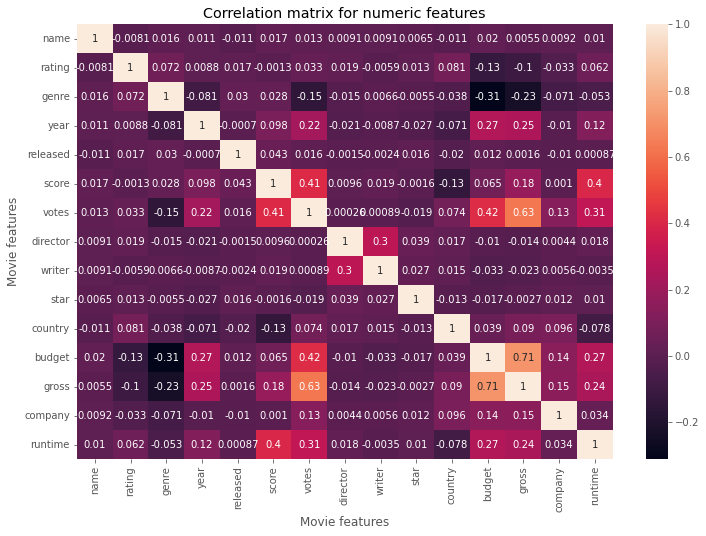

In [61]:
#visualize correlation matrix 

correlation_matirx = df_numerized.corr()
sns.heatmap(correlation_matirx, annot = True)

plt.title("Correlation matrix for numeric features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()